In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, model_selection

In [2]:
#Load datasets
X,y = datasets.load_diabetes(return_X_y = True)

In [23]:
print(X.shape) #442 rows & 10 columns

(442, 10)


In [24]:
print(y.shape)

(442,)


In [25]:
print(X[0]) #10 columns

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [26]:
print(y[0])

151.0


In [21]:
import pandas as pd
import numpy as np
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn
from sklearn.datasets import load_diabetes #importing data, beda dengan sklearn biasa
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
#scipy
from scipy.stats import loguniform

In [22]:
#importing dataset
diab = load_diabetes()

In [27]:
#defining feature and label
X = diab ['data']
y = diab ['target']

In [28]:
print(X.shape, y.shape) #X has 442 rows and 10 columns

(442, 10) (442,)


In [29]:
#creating dataframe from X
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

In [30]:
#adding 'progression' from y
df['progression'] = diab['target'] #last columns = progression

In [31]:
#showing head
df.head() #Big gap from progression columns (range >50) and others columns ex.bmi (below 0),, 
#need normalizations

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [32]:
#showing dataframe info
df.isnull().sum() #check nullvalues

age            0
sex            0
bmi            0
bp             0
tc             0
ldl            0
hdl            0
tch            0
ltg            0
glu            0
progression    0
dtype: int64

In [33]:
df.describe() #No Nullvalues

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


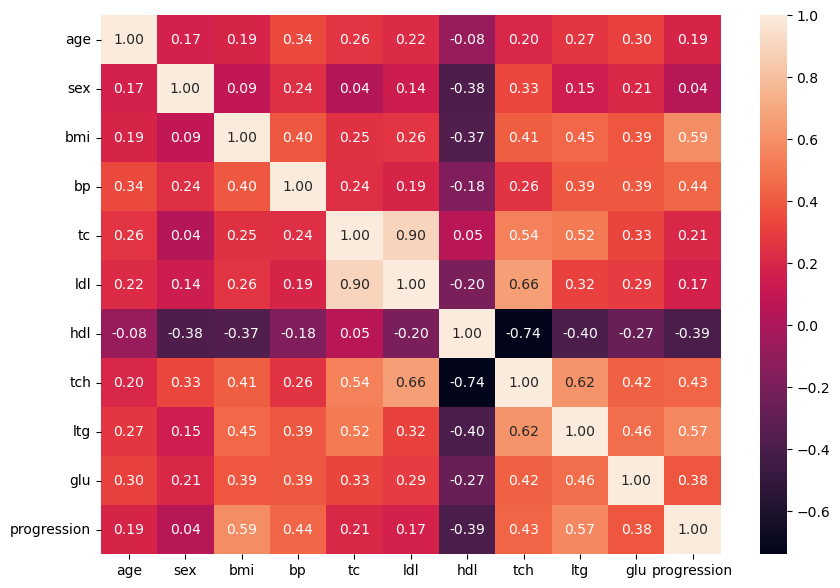

In [34]:
#Correlation Matrix

#figure size
plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

#From heatmap better ABOVE 0.5 correlations from target (progressions) are 'ltg', 'bmi'  
#2nd better correlation between 0.4-0.5 from target (progressions) are 'tch', 'bp'

<Figure size 1000x700 with 0 Axes>

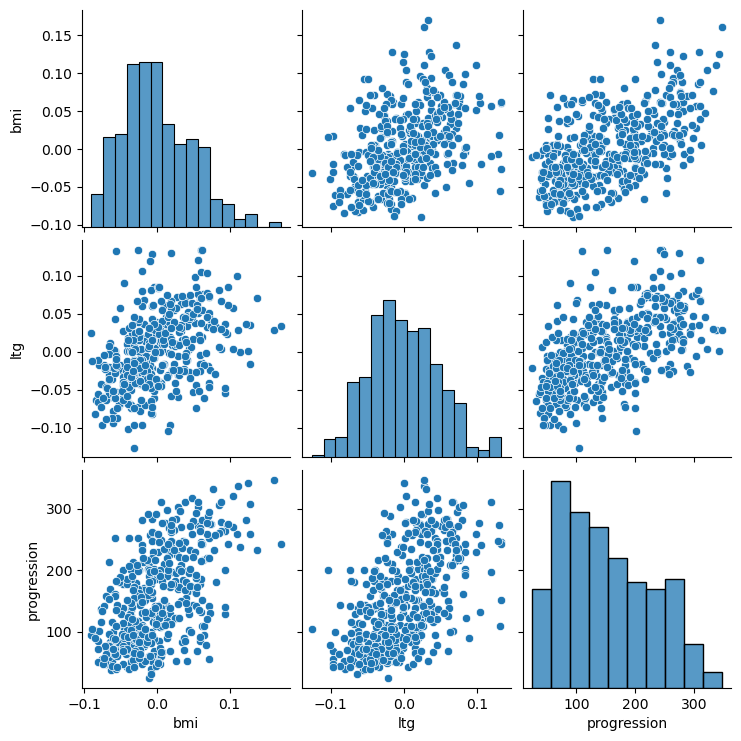

In [35]:
#Compare some columns (features) and target columns (progressions)

#figure size
plt.figure(figsize=(10, 7))
#plotting graphs
sns.pairplot(df[['bmi', 'ltg', 'progression']])

<Figure size 1000x700 with 0 Axes>

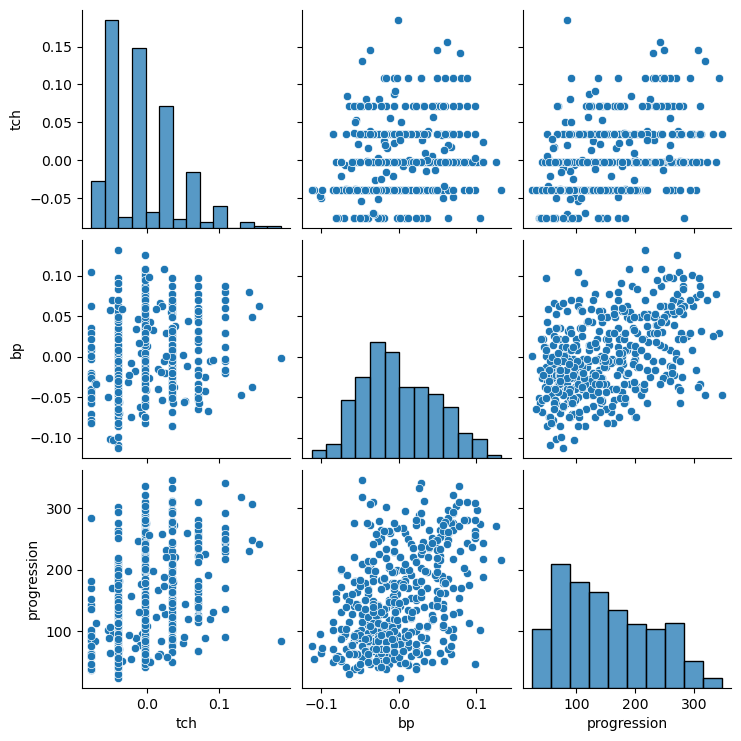

In [37]:
#Compare some columns (features) and target columns (progressions)

#figure size
plt.figure(figsize=(10, 7))
#plotting graphs
sns.pairplot(df[['tch', 'bp', 'progression']])

Text(0, 0.5, 'PROGRESSION')

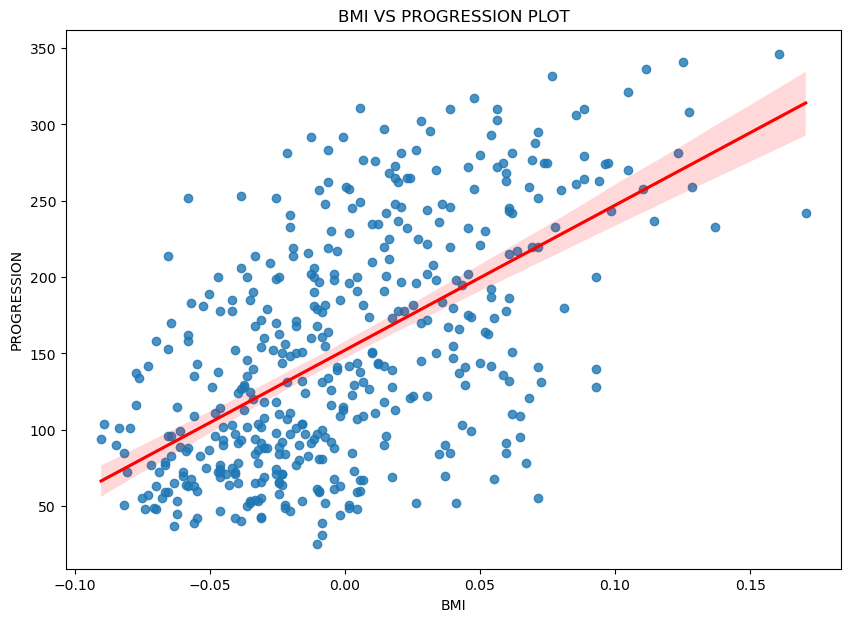

In [40]:
#we can see the relationship between BMI and progression

#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=df, x='bmi', y='progression',line_kws={"color": "red"})
#labeling
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

Text(0, 0.5, 'PROGRESSION')

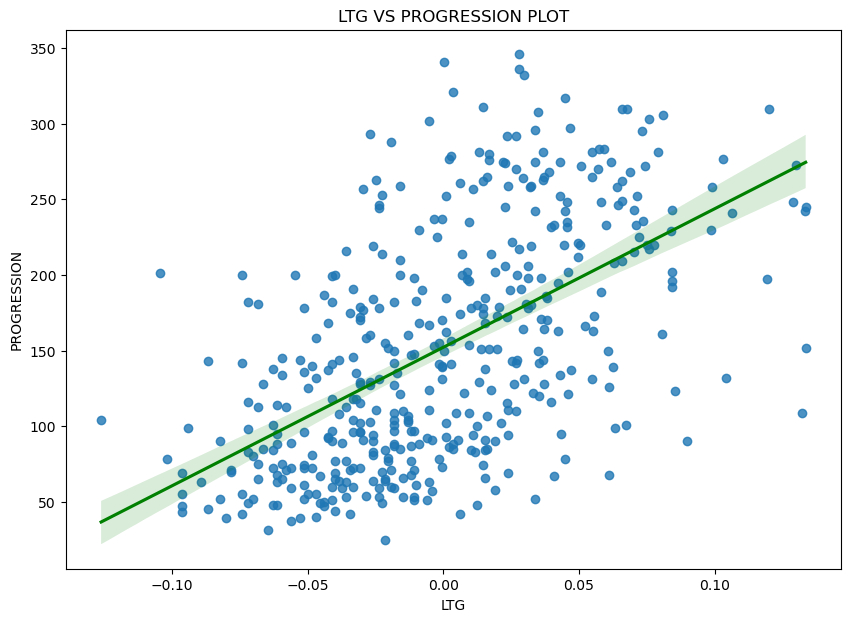

In [43]:
#we can see the relationship between ltg and progression 

#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=df, x='ltg', y='progression',line_kws={"color": "green"})
#labeling
plt.title('LTG VS PROGRESSION PLOT')
plt.xlabel('LTG')
plt.ylabel('PROGRESSION')

Text(0, 0.5, 'PROGRESSION')

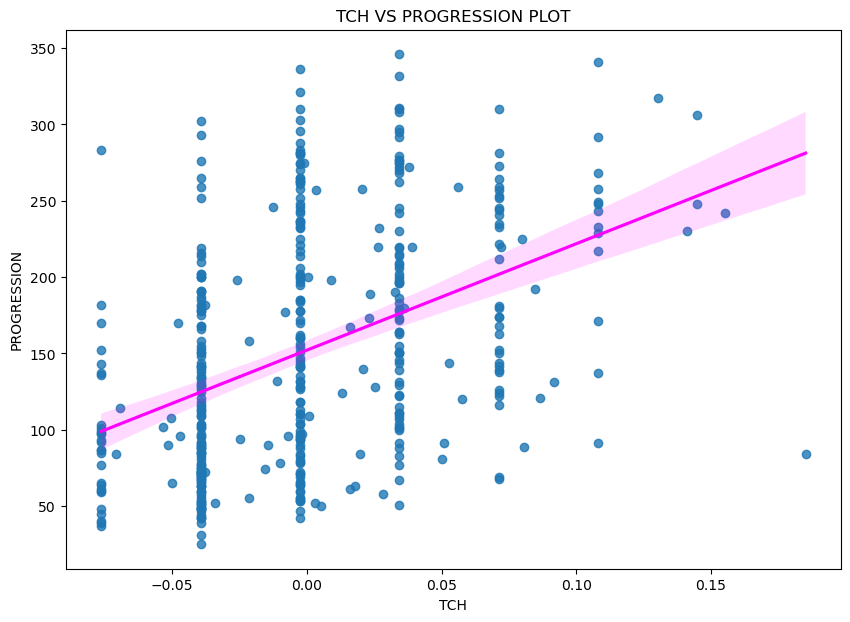

In [44]:
#we can see the relationship between TCH and progression 

#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=df, x='tch', y='progression',line_kws={"color": "magenta"})
#labeling
plt.title('TCH VS PROGRESSION PLOT')
plt.xlabel('TCH')
plt.ylabel('PROGRESSION')

Text(0, 0.5, 'PROGRESSION')

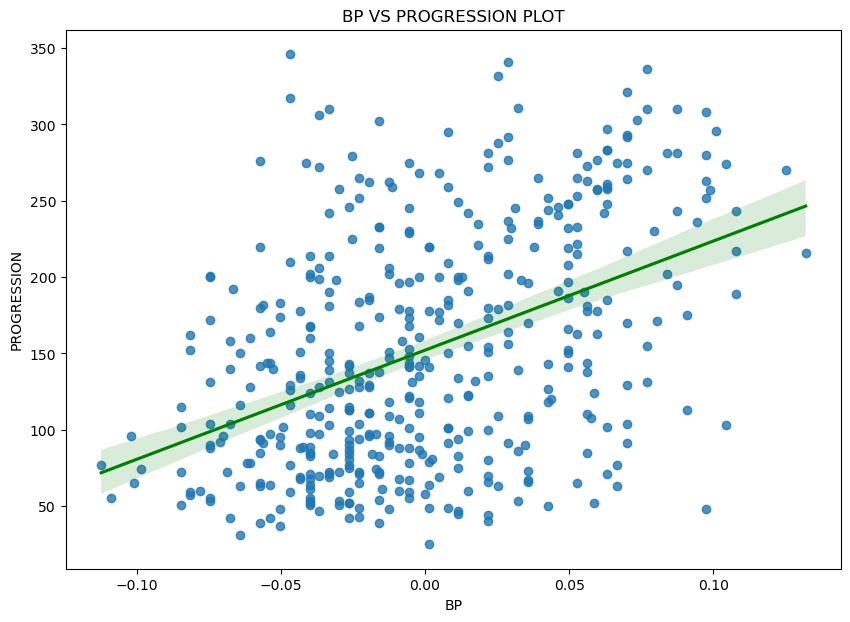

In [48]:
#we can see the relationship between BP and progression 

#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=df, x='bp', y='progression',line_kws={"color": "green"})
#labeling
plt.title('BP VS PROGRESSION PLOT')
plt.xlabel('BP')
plt.ylabel('PROGRESSION')

### Simple Linear Regression Model

In [ ]:
#defining features
X = df.iloc[:,:-1] #Progression is last features (-1)
#defining label
y = df['progression']

In [51]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [52]:
#fitting the model
reg = LinearRegression().fit(X_train, y_train)

In [53]:
#predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [54]:
#intercept
print(f'the intercept is:{reg.intercept_: .2f}')
#slope
print(f'the slope is:{reg.coef_}')

the intercept is: 151.35
the slope is:[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [55]:
#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set

Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.45


R², or the coefficient of determination, tells us the link between the variability of the data and the correctness of the model; the closer R² to 1 the better, because it means the model is accurate

In [56]:
#model metrics
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

The mean absolute error is: 42.79
The root mean squared error is: 53.85


MAE should be “as near as possible” to 0

## Real values vs Predicted

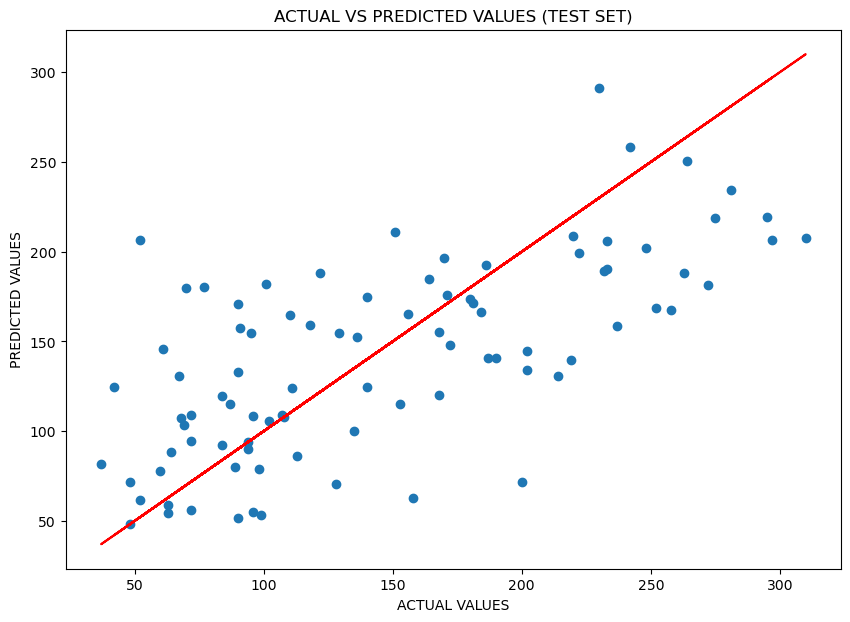

In [57]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
#showig plot
plt.show()

As can be seen from the graph above, there is no clear tendency for the spots to be distributed around a line, confirming the fact that linear regression is not a good model.

### Graph of the Kernel Density Estimation

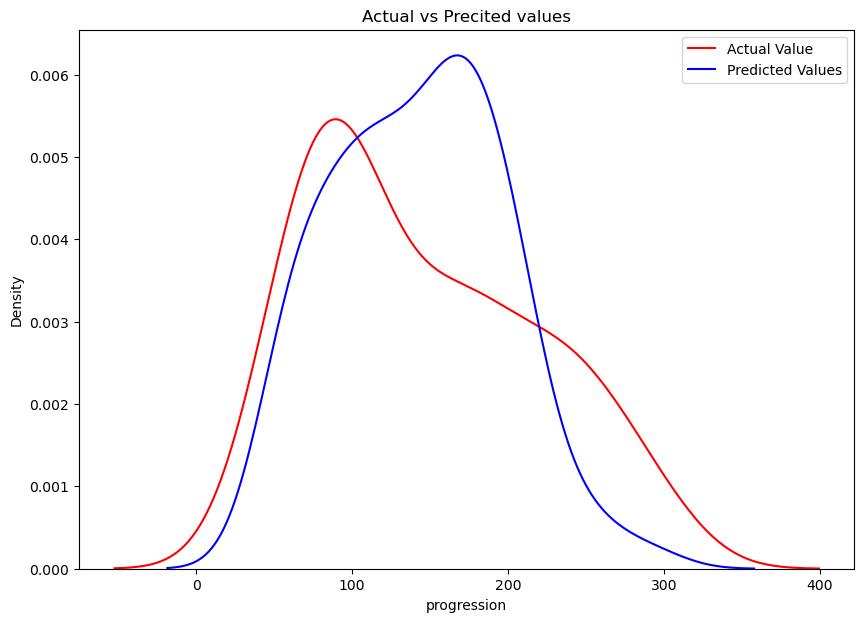

In [58]:
#image dimensions
plt.figure(figsize=(10, 7))
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

As can be seen from this graph, the probability density of the predicted values ​​does not approximate well the one relative to the real values.

# Check for least (Smalllest Correlations from Progressions / Target)

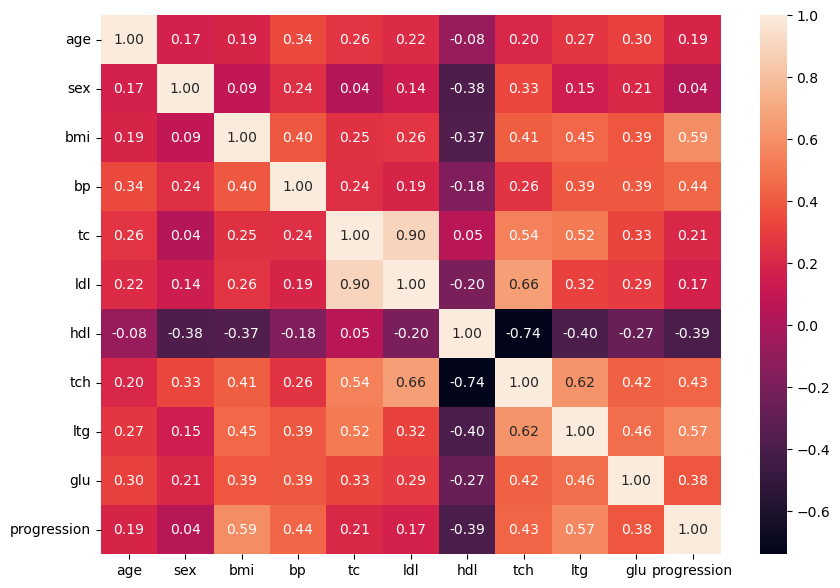

In [60]:
#Correlation Matrix

#figure size
plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

#From heatmap smallest correlations are ldl and tc
# - age and sex tend to doesn't impact -

<Figure size 1000x700 with 0 Axes>

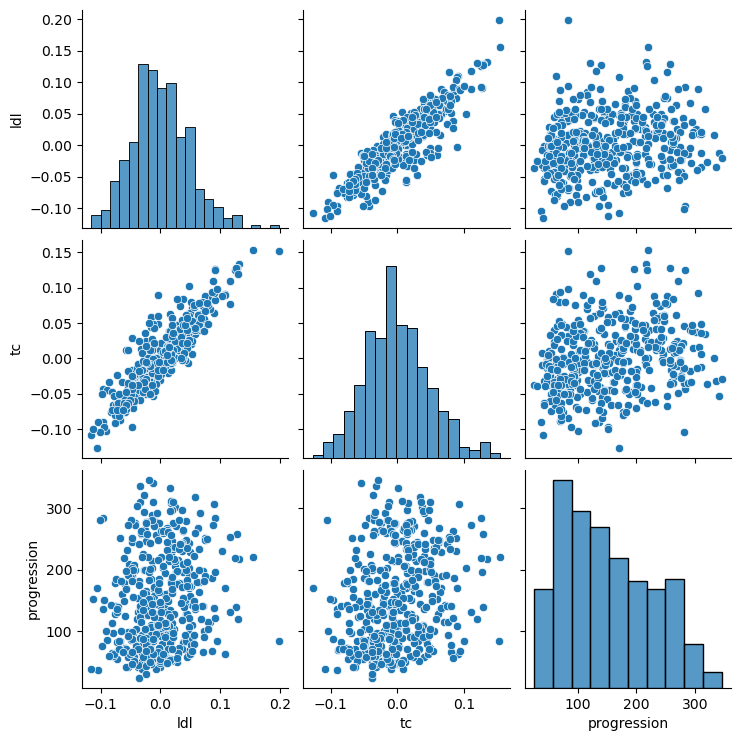

In [61]:
#Compare some columns (features) and target columns (progressions)

#figure size
plt.figure(figsize=(10, 7))
#plotting graphs
sns.pairplot(df[['ldl', 'tc', 'progression']])

Text(0, 0.5, 'PROGRESSION')

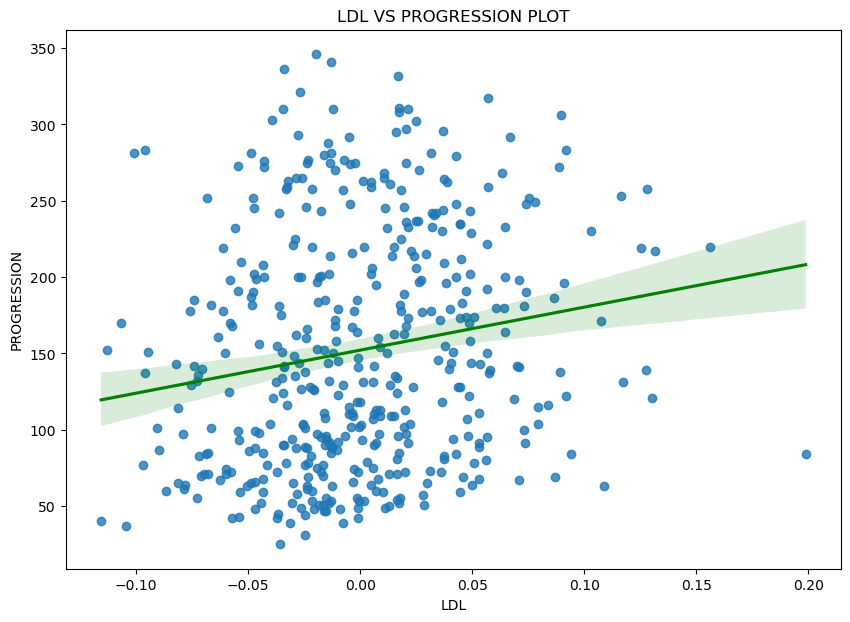

In [62]:
#we can see the relationship between ltg and progression 

#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=df, x='ldl', y='progression',line_kws={"color": "green"})
#labeling
plt.title('LDL VS PROGRESSION PLOT')
plt.xlabel('LDL')
plt.ylabel('PROGRESSION')

Text(0, 0.5, 'PROGRESSION')

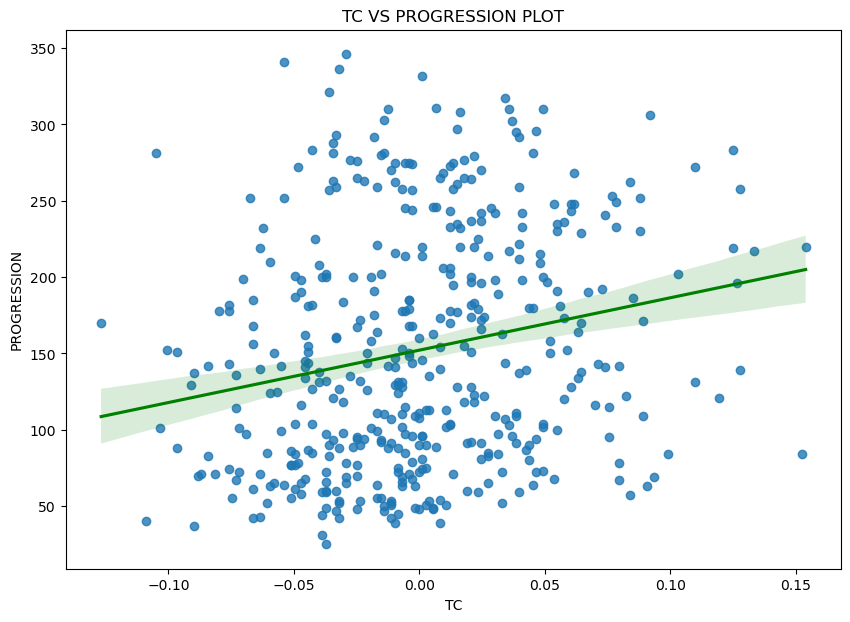

In [64]:
#we can see the relationship between ltg and progression 

#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=df, x='tc', y='progression',line_kws={"color": "green"})
#labeling
plt.title('TC VS PROGRESSION PLOT')
plt.xlabel('TC')
plt.ylabel('PROGRESSION')

In [65]:
#defining features
X = df.iloc[:,2:-1] #Progression is last features (-1)
#defining label
y = df['progression']

In [76]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

#fitting the model
reg = LinearRegression().fit(X_train, y_train)

#predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

#intercept
print(f'the intercept is:{reg.intercept_: .2f}')
#slope
print(f'the slope is:{reg.coef_}')

the intercept is: 152.07
the slope is:[ 552.53925002  280.94955072 -785.2058226   452.77990742  156.31000519
  150.24217052  739.45016979   55.7651667 ]


In [77]:
#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set

#model metrics
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

Coeff. of determination on train set: 0.49
Coeff. of determination on test set: 0.56
The mean absolute error is: 41.80
The root mean squared error is: 51.61


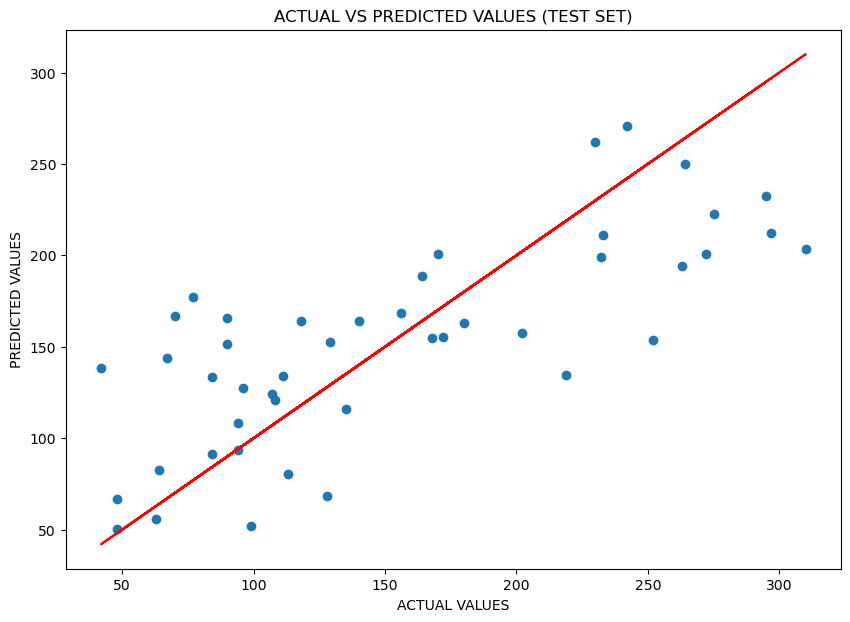

In [78]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
#showig plot
plt.show()

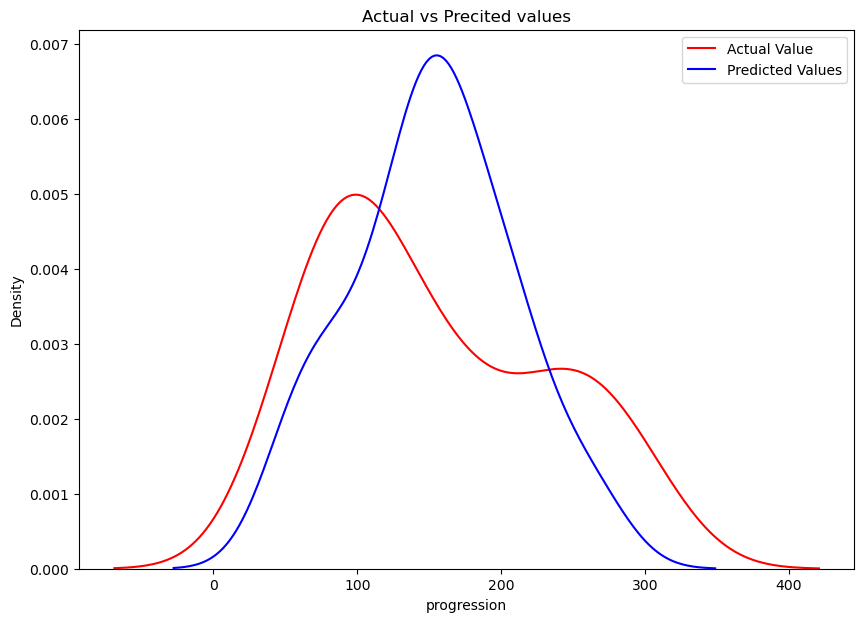

In [79]:
#image dimensions
plt.figure(figsize=(10, 7))
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

# Another Method

In [157]:
#Load datasets
X,y = datasets.load_diabetes(return_X_y = True)

In [158]:
X.shape

(442, 10)

In [159]:
y.shape

(442,)

In [160]:
# Extract the column at index 2
X = X[:,2]
print(X.shape)

(442,)


In [161]:
# Reshape into 2D array
X = X.reshape((-1,1))
X.shape

(442, 1)

In [162]:
#splitting 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33,random_state=42) #1/3 test size)

In [163]:
#Create linear Regression model and trained it with our data
model = linear_model.LinearRegression()

In [164]:
model.fit(X_train, y_train)

LinearRegression()

In [165]:
#Predict using our test data (1/3 test size)
y_pred = model.predict(X_test)

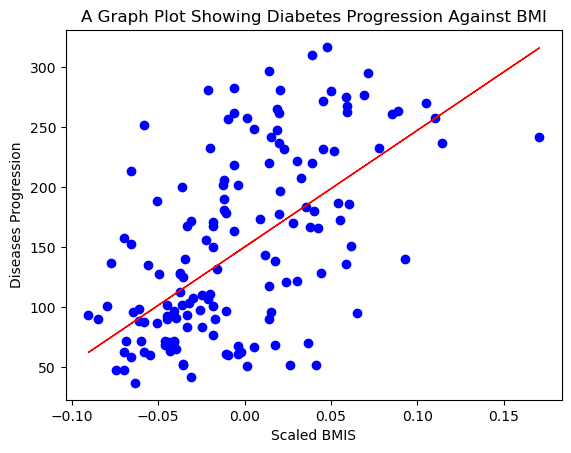

In [166]:
#HOW GOOD ARE PREDICTIONS

#Scatter Plot
plt.scatter(X_test ,y_test, color = 'blue') 

#Plot the predictions
plt.plot(X_test, y_pred, color = 'red', linewidth = 1)

#Add labels and a title 
plt.xlabel ('Scaled BMIS')
plt.ylabel ('Diseases Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()

#RED is prediction, Actual is in BLUE